# Machine Learning - Assignment 2

VSS Raviteja D     
121910318006     
3B18    

# Binary Classification vs Multi-class Classification

Binary Classification: Binary Classification is a classification used to classify atmost 2 different classes.
                       Some of the examples of algorithms that use Binary classification are Logistic Regression, Support                              Vector Machine(SVM) etc. 

Multi-class Classification: Multi-class classification is a classification used to classify 2 or more number of different
                            classes.
                            2 methods of classsifiers used in Multi-class classification are, OneVsOne and OneVsRest                                       classifiers. 
                            
                            

# Iris Classification with Multi-class Classification and Logistic Regression

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("iris.data",header=None)
data

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
data=data.rename(columns={0:'Sepal Length',1:'Sepal Width',2:'Petal Length',3:'Petal Width',4:'Class'})
data

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
data.shape

(150, 5)

In [5]:
X=data[['Sepal Length','Sepal Width','Petal Length','Petal Width','Class']]
X.values

array([[5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
       [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [4.6, 3.1, 1.5, 0.2, 'Iris-setosa'],
       [5.0, 3.6, 1.4, 0.2, 'Iris-setosa'],
       [5.4, 3.9, 1.7, 0.4, 'Iris-setosa'],
       [4.6, 3.4, 1.4, 0.3, 'Iris-setosa'],
       [5.0, 3.4, 1.5, 0.2, 'Iris-setosa'],
       [4.4, 2.9, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.1, 1.5, 0.1, 'Iris-setosa'],
       [5.4, 3.7, 1.5, 0.2, 'Iris-setosa'],
       [4.8, 3.4, 1.6, 0.2, 'Iris-setosa'],
       [4.8, 3.0, 1.4, 0.1, 'Iris-setosa'],
       [4.3, 3.0, 1.1, 0.1, 'Iris-setosa'],
       [5.8, 4.0, 1.2, 0.2, 'Iris-setosa'],
       [5.7, 4.4, 1.5, 0.4, 'Iris-setosa'],
       [5.4, 3.9, 1.3, 0.4, 'Iris-setosa'],
       [5.1, 3.5, 1.4, 0.3, 'Iris-setosa'],
       [5.7, 3.8, 1.7, 0.3, 'Iris-setosa'],
       [5.1, 3.8, 1.5, 0.3, 'Iris-setosa'],
       [5.4, 3.4, 1.7, 0.2, 'Iris-setosa'],
       [5.1, 3.7, 1.5, 0.4, 'Iris-setosa'],
       [4.6, 3.6, 1.0, 0.2, 'Iri

In [6]:
data['Class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
data['Class']=data['Class'].replace({'Iris-setosa':1,'Iris-versicolor':2,'Iris-virginica':3})
data

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


In [8]:
Y=data['Class']
Y

0      1
1      1
2      1
3      1
4      1
      ..
145    3
146    3
147    3
148    3
149    3
Name: Class, Length: 150, dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal Length  150 non-null    float64
 1   Sepal Width   150 non-null    float64
 2   Petal Length  150 non-null    float64
 3   Petal Width   150 non-null    float64
 4   Class         150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=5)

In [15]:
# from sklearn.preprocessing import MinMaxScaler
# scaler=MinMaxScaler()
# X_train=scaler.fit_transform(X_train)
# X_test=scaler.transform(X_test)

In [16]:
Y.values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int64)

In [17]:
class1_2=data[(data['Class']==1) | (data['Class']==2)]
class1_3=data[(data['Class']==1) | (data['Class']==3)]
class2_3=data[(data['Class']==2) | (data['Class']==3)]

In [18]:
class1_2

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,2
96,5.7,2.9,4.2,1.3,2
97,6.2,2.9,4.3,1.3,2
98,5.1,2.5,3.0,1.1,2


In [19]:
class1_3

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


In [20]:
class2_3

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
50,7.0,3.2,4.7,1.4,2
51,6.4,3.2,4.5,1.5,2
52,6.9,3.1,4.9,1.5,2
53,5.5,2.3,4.0,1.3,2
54,6.5,2.8,4.6,1.5,2
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


In [21]:
x1_2_train,x1_2_test,y1_2_train,y1_2_test=train_test_split(class1_2.iloc[:,:4],class1_2['Class'],random_state=0)

In [22]:
x1_3_train,x1_3_test,y1_3_train,y1_3_test=train_test_split(class1_3.iloc[:,:4],class1_3['Class'],random_state=0)

In [23]:
x2_3_train,x2_3_test,y2_3_train,y2_3_test=train_test_split(class2_3.iloc[:,:4],class2_3['Class'],random_state=0)

In [24]:
from sklearn.linear_model import LogisticRegression

model1_2=LogisticRegression()
model1_3=LogisticRegression()
model2_3=LogisticRegression()

model1_2.fit(x1_2_train,y1_2_train)

model1_3.fit(x1_3_train,y1_3_train)

model2_3.fit(x2_3_train,y2_3_train)

LogisticRegression()

In [25]:
y1_2_pred=model1_2.predict(x1_2_test)
y1_3_pred=model1_3.predict(x1_3_test)
y2_3_pred=model2_3.predict(x2_3_test)

In [26]:
tests1_2VS1_3=[[4.75,3.8,1.2,0.5]]
print("Given test data belongs to Class", model1_2.predict(tests1_2VS1_3)[0])

Given test data belongs to Class 1


In [27]:
print("Given test data belongs to Class",model1_3.predict(tests1_2VS1_3)[0])

Given test data belongs to Class 1


In [28]:
test1_2VS2_3=[[5.4, 2.3, 4, 1.5 ]]
print("Given test data belongs to Class",model1_2.predict(test1_2VS2_3)[0])

Given test data belongs to Class 2


In [29]:
print("Given test data belongs to Class",model2_3.predict(test1_2VS2_3)[0])

Given test data belongs to Class 2


In [30]:
test1_3VS2_3=[[6.1, 2.95, 5.5, 2 ]]
print("Given test data belongs to Class",model1_3.predict(test1_3VS2_3)[0])

Given test data belongs to Class 3


In [31]:
print("Given test data belongs to Class",model2_3.predict(test1_3VS2_3)[0])

Given test data belongs to Class 3


## This "one_vs_one" user defined function would find out the class with maximum model score among all...

In [32]:
import numpy as np


def one_vs_one(xt):
    Y_pred=[]
    for i in xt:
        d=[model1_2.predict([i])[0],model2_3.predict([i])[0],model1_3.predict([i])[0]]
        d1=[(d.count(d[0]),d[0]),(d.count(d[1]),d[1]),(d.count(d[2]),d[2])]
        Y_pred.append(max(d1)[1])
    return np.array(Y_pred)
# X_test,Y_test
# 5.8 2.7 3.9 1.2 -  2

### Testing the model with "X_test" cases...

In [33]:
X_test=X_test.iloc[:,:4]
X_test=X_test.values
Y_pred=one_vs_one(X_test)
Y_pred

# Y_pred=[]
# import numpy as np

# for i in X_test.iloc[:,:4].values:
#     Y_pred=np.append(Y_pred,one_vs_one(i))
# Y_pred,np.array(Y_test)


array([2, 3, 3, 1, 3, 2, 1, 3, 1, 2, 2, 3, 3, 3, 1, 1, 3, 3, 1, 1, 2, 3,
       1, 3, 2, 3, 2, 2, 2, 3, 1, 2, 2, 1, 2, 1, 1, 3], dtype=int64)

In [116]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

0.9473684210526315

### Some random test data to check the models....

In [117]:
test_cases=[[6.1,3.4,2.2,0.8],[5.8, 2.7 ,3.9, 1.2],[5.4,3.9,5,2.2],[6.5,2.9,4.2,1.9],[4.1,2.9,1.8,0.8],[7.1,5,4.9,2.2]]
print("Class: ",one_vs_one(test_cases))

Class:  [1 2 3 2 1 2]


In [118]:
from sklearn.metrics import confusion_matrix
print("\nConfusion Matrix : \n",confusion_matrix(Y_test,Y_pred))


Confusion Matrix : 
 [[12  0  0]
 [ 0 12  2]
 [ 0  0 12]]


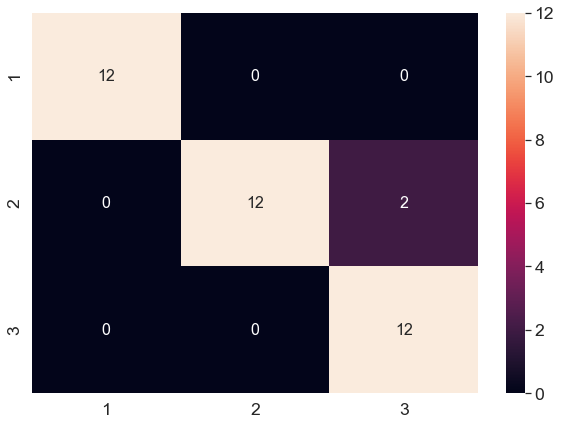

In [119]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt
cm = confusion_matrix(Y_test, Y_pred)
df_cm = pd.DataFrame(cm, range(1,4), range(1,4))
plt.figure(figsize=(10,7))
sn.set(font_scale=1.6) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()